In [1]:
!pip install transformers datasets -q


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.2/491.2 kB 13.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 9.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 10.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 14.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requ

In [2]:
!pip install evaluate -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 5.2 MB/s eta 0:00:00


In [3]:
!pip install --upgrade transformers -q


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.4/10.4 MB 116.2 MB/s eta 0:00:00


In [4]:
import json
import pandas as pd
from datasets import Dataset, DatasetDict

with open("qa.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Split 80-20
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

# Convert to HF dataset
dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df.reset_index(drop=True)),
    "test": Dataset.from_pandas(test_df.reset_index(drop=True))
})


In [5]:
len(train_df)

235

In [6]:
from transformers import AutoTokenizer

model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess(example):
    input_text = f"question: {example['question']} context: {example['context']}"
    target_text = example["answer"]

    model_inputs = tokenizer(input_text, max_length=512, padding="max_length", truncation=True)
    labels = tokenizer(target_text, max_length=64, padding="max_length", truncation=True)
    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

tokenized_dataset = dataset.map(preprocess)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/235 [00:00<?, ? examples/s]

Map:   0%|          | 0/59 [00:00<?, ? examples/s]

In [7]:
from transformers import AutoModelForSeq2SeqLM, TrainingArguments, Trainer, TrainerCallback

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Custom callback to store loss
train_loss = []

class LossLogger(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            train_loss.append(logs["loss"])

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=4,
    num_train_epochs=5,
    logging_steps=1,
    logging_dir="./logs",
    save_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    callbacks=[LossLogger]
)


<ipython-input-7-8b327b8311b5>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [8]:
# üß† Load model
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


In [9]:
# üìä Setup metrics
import evaluate

f1_metric = evaluate.load("f1")
em_metric = evaluate.load("exact_match")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Convert predictions and labels from tensor to lists
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Remove any padding tokens
    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    # Compute F1 and Exact Match
    f1 = f1_metric.compute(predictions=decoded_preds, references=decoded_labels)
    em = em_metric.compute(predictions=decoded_preds, references=decoded_labels)

    return {
        "f1": f1["f1"],
        "exact_match": em["exact_match"]
    }


In [10]:
# üìâ Track training loss
from transformers import TrainingArguments, Trainer, TrainerCallback

train_loss = []

class LossLogger(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            train_loss.append(logs["loss"])


In [11]:
# üõ†Ô∏è Training setup
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,  # Keep small to avoid OOM
    num_train_epochs=5,                      # Use half precision for lower memory
    logging_steps=1,
    eval_steps=30,   # Evaluate after each epoch 235/8
    save_strategy="epoch",
    logging_dir="./logs"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[LossLogger]
)


<ipython-input-11-03d3620b8ae8>:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [12]:
# üöÄ Train
import torch, os
# os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
torch.cuda.empty_cache()

trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shreysinha2002 (shreysinha2002-indian-institute-of-technology-patna) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


TrainOutput(global_step=150, training_loss=6.3324066336949665, metrics={'train_runtime': 345.5981, 'train_samples_per_second': 3.4, 'train_steps_per_second': 0.434, 'total_flos': 804589889126400.0, 'train_loss': 6.3324066336949665, 'epoch': 5.0})

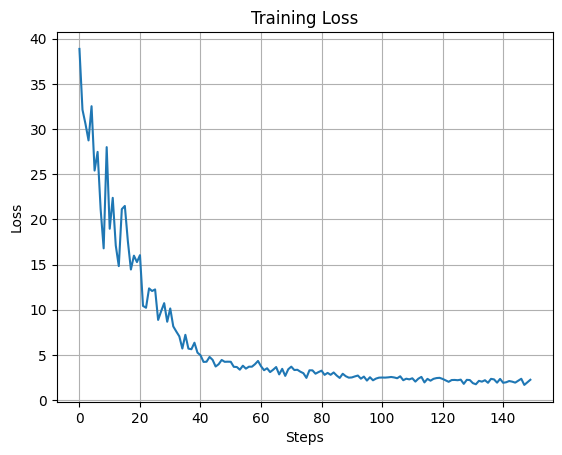

In [13]:
# üìà Plot training loss
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title("Training Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [14]:
# Save the model and tokenizer
model_save_path = "./finetuned_model"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

('./finetuned_model/tokenizer_config.json',
 './finetuned_model/special_tokens_map.json',
 './finetuned_model/spiece.model',
 './finetuned_model/added_tokens.json',
 './finetuned_model/tokenizer.json')

In [20]:
from google.colab import files
import os

# Zip everything inside /content
!zip -r finetuned_model.zip /content/finetuned_model



  adding: content/finetuned_model/ (stored 0%)
  adding: content/finetuned_model/model.safetensors (deflated 7%)
  adding: content/finetuned_model/tokenizer_config.json (deflated 95%)
  adding: content/finetuned_model/generation_config.json (deflated 29%)
  adding: content/finetuned_model/special_tokens_map.json (deflated 85%)
  adding: content/finetuned_model/tokenizer.json (deflated 74%)
  adding: content/finetuned_model/spiece.model (deflated 48%)
  adding: content/finetuned_model/config.json (deflated 62%)


In [21]:
!zip -r logs.zip /content/logs

  adding: content/logs/ (stored 0%)
  adding: content/logs/events.out.tfevents.1744969436.5f30fd111eb4.490.0 (deflated 69%)


In [1]:
import torch
import gc

# Clear cache and run garbage collection
torch.cuda.empty_cache()
gc.collect()


30

In [9]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "./finetuned_model"

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [8]:
from tqdm import tqdm

def generate_predictions(model, tokenizer, dataset, max_input_length=512, max_target_length=64):
    model.eval()
    predictions, references = [], []

    for item in tqdm(dataset):
        input_text = "question: " + item["question"] + " context: " + item["context"]
        input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True, max_length=max_input_length).to(model.device)

        with torch.no_grad():
            outputs = model.generate(input_ids, max_length=max_target_length)

        pred = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predictions.append(pred.strip())
        references.append(item["answer"].strip())

    return predictions, references

# Generate predictions and references
predictions, references = generate_predictions(model, tokenizer, tokenized_dataset["test"])


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 59/59 [00:13<00:00,  4.38it/s]


In [14]:
from evaluate import load

# Load the SQuAD metric
squad_metric = load("squad")

# Generate predictions and references (this assumes they are already computed)
predictions, references = generate_predictions(model, tokenizer, tokenized_dataset["test"])



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 59/59 [00:34<00:00,  1.72it/s]


In [18]:
test_df

context  \
1    World War II or the Second World War (1 Septem...   
3    The causes of World War II included unresolved...   
7    In 1940, the Soviets annexed the Baltic states...   
13   In 1944, the Western Allies invaded France at ...   
20   Aircraft carriers became the dominant capital ...   
21   Submarines played a key role, with Germany imp...   
34   Despite pacifist sentiment after World War I, ...   
48   The Arab‚ÄìIsraeli conflict escalated following ...   
49   Decolonisation followed WWII as European power...   
50   The United States emerged as the richest count...   
52   The Marshall Plan helped Western European reco...   
53   The Soviet Union recovered rapidly by seizing ...   
54   Japan recovered much later, while China return...   
58   On 22 June, the Soviets launched Operation Bag...   
71   By March 1944, the Allies had isolated Rabaul ...   
80   By May 1943, Germany temporarily halted its At...   
83   On 27 January 1944, Soviet forces ended the si...   
87   In March 1944, Japan launched an invasion of A...   
88   In May 1944, British and Indian forces counter...   
91   In the mid-1920s, the Kuomintang launched a un...   
99   The Xi'an Incident occurred in 1936, leading t...   
102  The League of Nations was set up in 1919 to ke...   
103  The League of Nations was intended to prevent ...   
105  In the 1920s, fascism rose as a nationalistic,...   
106  Adolf Hitler, leader of the Nazi party, preach...   
110  In March 1939, Germany broke its promise from ...   
121  Following the fall of France, Germany and Ital...   
129  In September 1943, Italy signed an armistice w...   
130  The Allies initiated a strategic bombing campa...   
131  Following the success at Guadalcanal, the Alli...   
133  After the defeat of German forces at Kursk in ...   
134  The Western Allies fought through several line...   
149  This attack was followed up shortly after by A...   
151  In April 1940, Germany invaded Denmark and Nor...   
160  Following the Japanese false flag Mukden incid...   
163  The Dutch government agreed to provide Japan w...   
166  On 3 November, Nagano explained in detail the ...   
169  On 7 December 1941 (8 December in Asian time z...   
171  On 1 September 1939, Germany invaded Poland af...   
174  On 27 September, the Warsaw garrison surrender...   
187  At the Battle of Midway in 1942, U.S. forces d...   
188  In February 1943, Germany suffered its first m...   
189  Soviet forces reached Berlin on 21 April 1945....   
191            With this, World War II came to an end.   
198  Technological advancements during World War II...   
205  The use of forced labor during World War II by...   
214  In April 1941, the Soviet Union and Japan sign...   
235  In March 1938, Germany annexed Austria with li...   
241  Germany and Italy formalized their alliance wi...   
243  On 29 August, Hitler demanded that a Polish pl...   
252  By early February 1943, the German Army was de...   
257  Germany experienced strong revanchist and nati...   
267  Germany and Italy formed the Rome‚ÄìBerlin Axis ...   
269  The Kuomintang unified China in the mid-1920s ...   
270  Japan staged the Mukden Incident in 1931 as a ...   
276  During World War II, Germany occupied much of ...   
281  During World War II, Germany occupied much of ...   
288  The German Empire was dissolved in the German ...   
293  The German Empire was dissolved in the German ...   

                                              question  \
1    What was the estimated number of deaths caused...   
3    What territorial actions did Germany take befo...   
7      Which countries were part of the Axis alliance?   
13             Why did Japan surrender in August 1945?   
20   Why did aircraft carriers become more importan...   
21   How did Germany and Britain differ in their us...   
34   What political sentiments emerged in Europe af...   
48   What triggered the escalation of the Arab‚ÄìIsra...   
49    Why did decolonisation occur aft

In [15]:
predictions

['70 to 85 million deaths, more than half of which were civilians.',
 "Germany's invasion of Manchuria in 1931, the Spanish Civil War, the outbreak of the Second Sino-Japanese War in 1937, and Germany's annexations of Austria and the Sudetenland.",
 'Germany gained control of much of continental Europe and formed the Axis alliance with Italy, Japan, and other countries.',
 'Japan announced its unconditional surrender on 15 August.',
 'Battleships',
 'Submarines played a key role, with Germany improving offensive capabilities through Type VII submarines and wolfpack tactics, while the British focused on anti-submarine weapons like sonar and homing torpedoes.',
 'Rearrangement of the Union',
 'Following the Arab rejection of the UN Partition Plan and the creation of Israel, the Arab‚ÄìIsraeli conflict escalated following the Arab rejection of the UN Partition Plan and the creation of Israel.',
 'Decolonisation followed WWII as European powers could not maintain their empires.',
 'United 

In [16]:
references

['Between 70 to 85 million people, over half of whom were civilians.',
 'Germany annexed Austria and the Sudetenland.',
 'Germany, Italy, Japan, and other allied nations.',
 'Because of the atomic bombings, the Soviet invasion of Manchuria, and the threat of Allied invasion.',
 'Aircraft carriers became more important because they were crucial in naval battles and more economical than heavily armoured battleships.',
 'Germany focused on improving offensive capabilities, while Britain concentrated on anti-submarine weapons and tactics.',
 'Irredentist and revanchist nationalism.',
 'The Arab rejection of the UN Partition Plan for Palestine and the creation of Israel.',
 'Because European powers lost prestige and resources and could not maintain their empires.',
 'The United States.',
 'It helped Western European recovery and contributed to the German economic miracle.',
 'By seizing German industrial plants and exacting war reparations from satellite states.',
 'China returned to pre-wa

In [20]:
!pip install evaluate
import evaluate

bleu = evaluate.load("bleu")
results_bleu = bleu.compute(predictions=predictions, references=references)
print("BLEU:", results_bleu["bleu"])


BLEU: 0.21002019875153016


In [26]:
from evaluate import load

squad_v2_metric = load("squad_v2")

# Build data
predictions_formatted = [
    {
        "id": str(i),
        "prediction_text": pred,
        "no_answer_probability": 0.0
    } for i, pred in enumerate(predictions)
]

references_formatted = [
    {
        "id": str(i),
        "answers": {
            "text": [ref],
            "answer_start": [0]  # Safe default for evaluation
        }
    } for i, ref in enumerate(references)
]

# Compute
results = squad_v2_metric.compute(predictions=predictions_formatted, references=references_formatted)

# Print
print("‚úÖ Evaluation Results:")
print(f"Exact Match: {results['exact']:.2f}")
print(f"F1 Score: {results['f1']:.2f}")


‚úÖ Evaluation Results:
Exact Match: 6.78
F1 Score: 42.09
